# Capstone 3 - Data Wrangling and EDA 

## DATA WRANGLING

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
hadoop_data = pd.read_csv('Hadoop_2k.log_structured.csv')
hadoop_data.head()

,LineId,Date,Time,Level,Process,Component,Content,EventId,EventTemplate
0,1,2015-10-18,"18:01:47,978",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...
1,2,2015-10-18,"18:01:48,963",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:
2,3,2015-10-18,"18:01:48,963",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app..."
3,4,2015-10-18,"18:01:49,228",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,Using mapred newApiCommitter.
4,5,2015-10-18,"18:01:50,353",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,OutputCommitter set in config null


In [3]:
zookeeper_data = pd.read_csv('Zookeeper_2k.log_structured.csv')

In [4]:
zookeeper_data.head()

,LineId,Date,Time,Level,Node,Component,Id,Content,EventId,EventTemplate
0,1,2015-07-29,"17:41:44,747",INFO,QuorumPeer[myid=1]/0,0:0:0:0:0:0:0:2181:FastLeaderElection,774,Notification time out: 3200,E31,Notification time out: <*>
1,2,2015-07-29,"19:04:12,394",INFO,/10.10.34.11,3888:QuorumCnxManager$Listener,493,Received connection request /10.10.34.11:45307,E40,Received connection request /<*>:<*>
2,3,2015-07-29,"19:04:29,071",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,688,Send worker leaving thread,E42,Send worker leaving thread
3,4,2015-07-29,"19:04:29,079",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,679,Interrupted while waiting for message on queue,E24,Interrupted while waiting for message on queue
4,5,2015-07-29,"19:13:17,524",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,688,Send worker leaving thread,E42,Send worker leaving thread


In [5]:
hadoop_data['Process'].isna().sum()

np.int64(0)

In [6]:
hadoop_data['EventId'].isna().sum()

np.int64(0)

In [7]:
zookeeper_data['Node'].isna().sum()

np.int64(0)

In [8]:
zookeeper_data['Id'].isna().sum()

np.int64(0)

In [9]:
zookeeper_data['LogType'] = 'zookeeper'
hadoop_data['LogType'] = 'hadoop'

In [10]:
hadoop_data['AdditionalInformation'] = 'Process: ' + hadoop_data['Process'].astype(str)

In [11]:
hadoop_data.head()

,LineId,Date,Time,Level,Process,Component,Content,EventId,EventTemplate,LogType,AdditionalInformation
0,1,2015-10-18,"18:01:47,978",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...,hadoop,Process: main
1,2,2015-10-18,"18:01:48,963",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:,hadoop,Process: main
2,3,2015-10-18,"18:01:48,963",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",hadoop,Process: main
3,4,2015-10-18,"18:01:49,228",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,Using mapred newApiCommitter.,hadoop,Process: main
4,5,2015-10-18,"18:01:50,353",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,OutputCommitter set in config null,hadoop,Process: main


In [12]:
hadoop_data.head()

,LineId,Date,Time,Level,Process,Component,Content,EventId,EventTemplate,LogType,AdditionalInformation
0,1,2015-10-18,"18:01:47,978",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...,hadoop,Process: main
1,2,2015-10-18,"18:01:48,963",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:,hadoop,Process: main
2,3,2015-10-18,"18:01:48,963",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",hadoop,Process: main
3,4,2015-10-18,"18:01:49,228",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,Using mapred newApiCommitter.,hadoop,Process: main
4,5,2015-10-18,"18:01:50,353",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,OutputCommitter set in config null,hadoop,Process: main


In [13]:
hadoop_data['Process'].unique()

array(['main', 'Socket Reader #1 for port 62260', 'IPC Server Responder',
       'IPC Server listener on 62260', 'AsyncDispatcher event handler',
       'Socket Reader #1 for port 62270', 'IPC Server listener on 62270',
       'CommitterEvent Processor #0', 'Thread-50', 'eventHandlingThread',
       'RMCommunicator Allocator', 'ContainerLauncher #0',
       'ContainerLauncher #1', 'ContainerLauncher #2',
       'IPC Server handler 13 on 62270', 'IPC Server handler 27 on 62270',
       'IPC Server handler 14 on 62270', 'IPC Server handler 18 on 62270',
       'IPC Server handler 12 on 62270', 'IPC Server handler 9 on 62270',
       'IPC Server handler 11 on 62270', 'IPC Server handler 28 on 62270',
       'IPC Server handler 10 on 62270', 'ContainerLauncher #3',
       'IPC Server handler 8 on 62270', 'IPC Server handler 20 on 62270',
       'IPC Server handler 5 on 62270', 'IPC Server handler 16 on 62270',
       'IPC Server handler 0 on 62270', 'IPC Server handler 3 on 62270',
       

In [14]:
hadoop_data['Process'].unique()

array(['main', 'Socket Reader #1 for port 62260', 'IPC Server Responder',
       'IPC Server listener on 62260', 'AsyncDispatcher event handler',
       'Socket Reader #1 for port 62270', 'IPC Server listener on 62270',
       'CommitterEvent Processor #0', 'Thread-50', 'eventHandlingThread',
       'RMCommunicator Allocator', 'ContainerLauncher #0',
       'ContainerLauncher #1', 'ContainerLauncher #2',
       'IPC Server handler 13 on 62270', 'IPC Server handler 27 on 62270',
       'IPC Server handler 14 on 62270', 'IPC Server handler 18 on 62270',
       'IPC Server handler 12 on 62270', 'IPC Server handler 9 on 62270',
       'IPC Server handler 11 on 62270', 'IPC Server handler 28 on 62270',
       'IPC Server handler 10 on 62270', 'ContainerLauncher #3',
       'IPC Server handler 8 on 62270', 'IPC Server handler 20 on 62270',
       'IPC Server handler 5 on 62270', 'IPC Server handler 16 on 62270',
       'IPC Server handler 0 on 62270', 'IPC Server handler 3 on 62270',
       

In [15]:
zookeeper_data['Node'].unique()

array(['QuorumPeer[myid=1]/0', '/10.10.34.11', 'SendWorker', 'RecvWorker',
       'NIOServerCxn.Factory', 'CommitProcessor', 'WorkerSender[myid=1]',
       'ProcessThread(sid', 'SessionTracker',
       'LearnerHandler-/10.10.34.12', 'Thread-1',
       'WorkerReceiver[myid=1]', 'main', 'QuorumPeer[myid=2]/0',
       'LearnerHandler-/10.10.34.11', 'LearnerHandler-/10.10.34.13',
       '/10.10.34.12', 'WorkerReceiver[myid=2]', 'WorkerSender[myid=3]',
       'WorkerReceiver[myid=3]', '/10.10.34.13', 'QuorumPeer[myid=3]/0'],
      dtype=object)

In [16]:
zookeeper_data['Node'].nunique()

22

In [17]:
zookeeper_data['AdditionalInformation'] = 'Node: ' +zookeeper_data['Node'].astype(str)+ ' Id: ' + zookeeper_data['Id'].astype(str)

In [18]:
zookeeper_data.head()

,LineId,Date,Time,Level,Node,Component,Id,Content,EventId,EventTemplate,LogType,AdditionalInformation
0,1,2015-07-29,"17:41:44,747",INFO,QuorumPeer[myid=1]/0,0:0:0:0:0:0:0:2181:FastLeaderElection,774,Notification time out: 3200,E31,Notification time out: <*>,zookeeper,Node: QuorumPeer[myid=1]/0 Id: 774
1,2,2015-07-29,"19:04:12,394",INFO,/10.10.34.11,3888:QuorumCnxManager$Listener,493,Received connection request /10.10.34.11:45307,E40,Received connection request /<*>:<*>,zookeeper,Node: /10.10.34.11 Id: 493
2,3,2015-07-29,"19:04:29,071",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,688,Send worker leaving thread,E42,Send worker leaving thread,zookeeper,Node: SendWorker Id: 688
3,4,2015-07-29,"19:04:29,079",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,679,Interrupted while waiting for message on queue,E24,Interrupted while waiting for message on queue,zookeeper,Node: SendWorker Id: 679
4,5,2015-07-29,"19:13:17,524",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,688,Send worker leaving thread,E42,Send worker leaving thread,zookeeper,Node: SendWorker Id: 688


In [19]:
zookeeper_data.head()

,LineId,Date,Time,Level,Node,Component,Id,Content,EventId,EventTemplate,LogType,AdditionalInformation
0,1,2015-07-29,"17:41:44,747",INFO,QuorumPeer[myid=1]/0,0:0:0:0:0:0:0:2181:FastLeaderElection,774,Notification time out: 3200,E31,Notification time out: <*>,zookeeper,Node: QuorumPeer[myid=1]/0 Id: 774
1,2,2015-07-29,"19:04:12,394",INFO,/10.10.34.11,3888:QuorumCnxManager$Listener,493,Received connection request /10.10.34.11:45307,E40,Received connection request /<*>:<*>,zookeeper,Node: /10.10.34.11 Id: 493
2,3,2015-07-29,"19:04:29,071",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,688,Send worker leaving thread,E42,Send worker leaving thread,zookeeper,Node: SendWorker Id: 688
3,4,2015-07-29,"19:04:29,079",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,679,Interrupted while waiting for message on queue,E24,Interrupted while waiting for message on queue,zookeeper,Node: SendWorker Id: 679
4,5,2015-07-29,"19:13:17,524",WARN,SendWorker,188978561024:QuorumCnxManager$SendWorker,688,Send worker leaving thread,E42,Send worker leaving thread,zookeeper,Node: SendWorker Id: 688


In [20]:
hadoop_data = hadoop_data.drop(columns=['Process'], axis=1)

In [21]:
zookeeper_data = zookeeper_data.drop(columns=['Node', 'Id'],axis=1)

In [22]:
logs_data = pd.concat([hadoop_data, zookeeper_data],axis=0)

In [23]:
logs_data.shape

(4000, 10)

In [24]:
logs_data.head()

,LineId,Date,Time,Level,Component,Content,EventId,EventTemplate,LogType,AdditionalInformation
0,1,2015-10-18,"18:01:47,978",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...,hadoop,Process: main
1,2,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:,hadoop,Process: main
2,3,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",hadoop,Process: main
3,4,2015-10-18,"18:01:49,228",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,Using mapred newApiCommitter.,hadoop,Process: main
4,5,2015-10-18,"18:01:50,353",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,OutputCommitter set in config null,hadoop,Process: main


In [25]:
# Checking Null values

In [26]:
logs_data.isna().sum()

LineId                   0
Date                     0
Time                     0
Level                    0
Component                0
Content                  0
EventId                  0
EventTemplate            0
LogType                  0
AdditionalInformation    0
dtype: int64

In [27]:
logs_data.head()

,LineId,Date,Time,Level,Component,Content,EventId,EventTemplate,LogType,AdditionalInformation
0,1,2015-10-18,"18:01:47,978",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...,hadoop,Process: main
1,2,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:,hadoop,Process: main
2,3,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",hadoop,Process: main
3,4,2015-10-18,"18:01:49,228",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,Using mapred newApiCommitter.,hadoop,Process: main
4,5,2015-10-18,"18:01:50,353",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,OutputCommitter set in config null,hadoop,Process: main


In [28]:
logs_data['timestamp'] = pd.to_datetime(logs_data['Date'] + ' ' + logs_data['Time'],format="%Y-%m-%d %H:%M:%S,%f")

In [29]:
logs_data.head()

,LineId,Date,Time,Level,Component,Content,EventId,EventTemplate,LogType,AdditionalInformation,timestamp
0,1,2015-10-18,"18:01:47,978",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...,hadoop,Process: main,2015-10-18 18:01:47.978
1,2,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:,hadoop,Process: main,2015-10-18 18:01:48.963
2,3,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",hadoop,Process: main,2015-10-18 18:01:48.963
3,4,2015-10-18,"18:01:49,228",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,Using mapred newApiCommitter.,hadoop,Process: main,2015-10-18 18:01:49.228
4,5,2015-10-18,"18:01:50,353",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,OutputCommitter set in config null,hadoop,Process: main,2015-10-18 18:01:50.353


In [30]:
logs_data['EventTemplate'].unique()

array(['Created MRAppMaster for application appattempt_<*>',
       'Executing with tokens:',
       'Kind: YARN_AM_RM_TOKEN, Service: , Ident: (appAttemptId { application_id { id: <*> cluster_timestamp: <*> } attemptId: <*> } keyId: <*>)',
       'Using mapred newApiCommitter.',
       'OutputCommitter set in config null',
       'OutputCommitter is org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter',
       'Registering class org.apache.hadoop.mapreduce.<*> for class org.apache.hadoop.mapreduce.<*>',
       'Default file system [hdfs://<*>:<*>]',
       'Emitting job history data to the timeline server is not enabled',
       'loaded properties from hadoop-metrics2.properties',
       'Scheduled snapshot period at <*> second(s).',
       'MRAppMaster metrics system started',
       'Adding job token for job_<*> to jobTokenSecretManager',
       'Not uberizing job_<*> because: not enabled; too many maps; too much input;',
       'Input size for job job_<*> = <*>. Number of spl

In [31]:
logs_data['EventTemplate'] = logs_data['EventTemplate'].str.replace(r'<\*>','<VAR>', regex=True)

In [32]:
logs_data['EventTemplate'] = logs_data['EventTemplate'].str.replace(r' {2,3,}','', regex=True)

In [33]:
logs_data.head()

,LineId,Date,Time,Level,Component,Content,EventId,EventTemplate,LogType,AdditionalInformation,timestamp
0,1,2015-10-18,"18:01:47,978",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,Created MRAppMaster for application appattempt...,hadoop,Process: main,2015-10-18 18:01:47.978
1,2,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,Executing with tokens:,hadoop,Process: main,2015-10-18 18:01:48.963
2,3,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",hadoop,Process: main,2015-10-18 18:01:48.963
3,4,2015-10-18,"18:01:49,228",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,Using mapred newApiCommitter.,hadoop,Process: main,2015-10-18 18:01:49.228
4,5,2015-10-18,"18:01:50,353",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,OutputCommitter set in config null,hadoop,Process: main,2015-10-18 18:01:50.353


In [34]:
logs_data['EventTemplate'].unique()

array(['Created MRAppMaster for application appattempt_<VAR>',
       'Executing with tokens:',
       'Kind: YARN_AM_RM_TOKEN, Service: , Ident: (appAttemptId { application_id { id: <VAR> cluster_timestamp: <VAR> } attemptId: <VAR> } keyId: <VAR>)',
       'Using mapred newApiCommitter.',
       'OutputCommitter set in config null',
       'OutputCommitter is org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter',
       'Registering class org.apache.hadoop.mapreduce.<VAR> for class org.apache.hadoop.mapreduce.<VAR>',
       'Default file system [hdfs://<VAR>:<VAR>]',
       'Emitting job history data to the timeline server is not enabled',
       'loaded properties from hadoop-metrics2.properties',
       'Scheduled snapshot period at <VAR> second(s).',
       'MRAppMaster metrics system started',
       'Adding job token for job_<VAR> to jobTokenSecretManager',
       'Not uberizing job_<VAR> because: not enabled; too many maps; too much input;',
       'Input size for job job_

In [35]:
# Converting to lower case
logs_data['EventTemplate'] = logs_data['EventTemplate'].str.lower()

In [36]:
# Removing the extra spaces
#logs_data['EventTemplate'] = logs_data['EventTemplate'].str.strip().str.replace(r'\s+','<SPACE>',regex=True)
logs_data['EventTemplate'] = logs_data['EventTemplate'].str.strip().str.replace('{ ','',regex=True)
logs_data['EventTemplate'] = logs_data['EventTemplate'].str.strip().str.replace(' }','',regex=True)

In [37]:
logs_data['EventTemplate'].unique()

array(['created mrappmaster for application appattempt_<var>',
       'executing with tokens:',
       'kind: yarn_am_rm_token, service: , ident: (appattemptid application_id id: <var> cluster_timestamp: <var> attemptid: <var> keyid: <var>)',
       'using mapred newapicommitter.',
       'outputcommitter set in config null',
       'outputcommitter is org.apache.hadoop.mapreduce.lib.output.fileoutputcommitter',
       'registering class org.apache.hadoop.mapreduce.<var> for class org.apache.hadoop.mapreduce.<var>',
       'default file system [hdfs://<var>:<var>]',
       'emitting job history data to the timeline server is not enabled',
       'loaded properties from hadoop-metrics2.properties',
       'scheduled snapshot period at <var> second(s).',
       'mrappmaster metrics system started',
       'adding job token for job_<var> to jobtokensecretmanager',
       'not uberizing job_<var> because: not enabled; too many maps; too much input;',
       'input size for job job_<var> = 

In [38]:
logs_data['input'] = 'Component: '+ logs_data['Component'] + ' Content: '+ logs_data['Content']+ ' EventId: '+ logs_data['EventId']+ ' EventTemplate: '+ logs_data['EventTemplate']

In [39]:
logs_data['input'] = logs_data.apply(lambda row: json.dumps({
    "Component": row['Component'],
    "Content": row['Content'],
    "EventId": row['EventId'],
    "EventTemplate": row['EventTemplate']
}), axis=1)

In [40]:
logs_data['input'].unique()

array(['{"Component": "org.apache.hadoop.mapreduce.v2.app.MRAppMaster", "Content": "Created MRAppMaster for application appattempt_1445144423722_0020_000001", "EventId": "E29", "EventTemplate": "created mrappmaster for application appattempt_<var>"}',
       '{"Component": "org.apache.hadoop.mapreduce.v2.app.MRAppMaster", "Content": "Executing with tokens:", "EventId": "E42", "EventTemplate": "executing with tokens:"}',
       '{"Component": "org.apache.hadoop.mapreduce.v2.app.MRAppMaster", "Content": "Kind: YARN_AM_RM_TOKEN, Service: , Ident: (appAttemptId { application_id { id: 20 cluster_timestamp: 1445144423722 } attemptId: 1 } keyId: -127633188)", "EventId": "E61", "EventTemplate": "kind: yarn_am_rm_token, service: , ident: (appattemptid application_id id: <var> cluster_timestamp: <var> attemptid: <var> keyid: <var>)"}',
       ...,
       '{"Component": "ZooKeeperServer", "Content": "Expiring session 0x14f05578bd80006, timeout of 10000ms exceeded", "EventId": "E15", "EventTemplat

In [41]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# Step 2: Add custom placeholder tokens
tokenizer.add_tokens(["<VAR>"])
logs_data['tokens'] = logs_data['EventTemplate'].apply(lambda x: tokenizer.tokenize(x))

In [42]:
logs_data.head()

,LineId,Date,Time,Level,Component,Content,EventId,EventTemplate,LogType,AdditionalInformation,timestamp,input,tokens
0,1,2015-10-18,"18:01:47,978",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt...,E29,created mrappmaster for application appattempt...,hadoop,Process: main,2015-10-18 18:01:47.978,"{""Component"": ""org.apache.hadoop.mapreduce.v2....","[created, mr, ##app, ##master, for, applicatio..."
1,2,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:,E42,executing with tokens:,hadoop,Process: main,2015-10-18 18:01:48.963,"{""Component"": ""org.apache.hadoop.mapreduce.v2....","[executing, with, token, ##s, :]"
2,3,2015-10-18,"18:01:48,963",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (app...",E61,"kind: yarn_am_rm_token, service: , ident: (app...",hadoop,Process: main,2015-10-18 18:01:48.963,"{""Component"": ""org.apache.hadoop.mapreduce.v2....","[kind, :, yarn, _, am, _, rm, _, token, ,, ser..."
3,4,2015-10-18,"18:01:49,228",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.,E111,using mapred newapicommitter.,hadoop,Process: main,2015-10-18 18:01:49.228,"{""Component"": ""org.apache.hadoop.mapreduce.v2....","[using, map, ##red, new, ##ap, ##ico, ##mm, ##..."
4,5,2015-10-18,"18:01:50,353",INFO,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null,E76,outputcommitter set in config null,hadoop,Process: main,2015-10-18 18:01:50.353,"{""Component"": ""org.apache.hadoop.mapreduce.v2....","[output, ##com, ##mit, ##ter, set, in, con, ##..."


In [43]:
logs_data['tokens']

0       [created, mr, ##app, ##master, for, applicatio...
1                        [executing, with, token, ##s, :]
2       [kind, :, yarn, _, am, _, rm, _, token, ,, ser...
3       [using, map, ##red, new, ##ap, ##ico, ##mm, ##...
4       [output, ##com, ##mit, ##ter, set, in, con, ##...
                              ...                        
1995    [client, attempting, to, establish, new, sessi...
1996    [closed, socket, connection, for, client, /, <...
1997    [ex, ##pi, ##ring, session, <var>, ,, time, ##...
1998    [ex, ##pi, ##ring, session, <var>, ,, time, ##...
1999    [processed, session, termination, for, session...
Name: tokens, Length: 4000, dtype: object

## EDA

<Axes: xlabel='Level'>

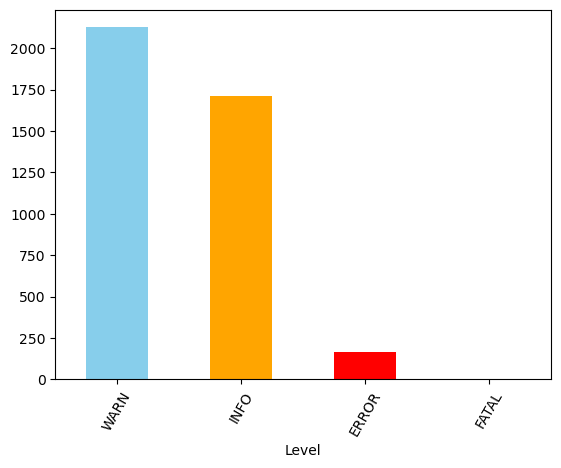

In [44]:
# Exploring the Target variables
logs_data['Level'].value_counts().plot(kind='bar',rot=60, color=['skyblue', 'orange', 'red', 'lightgreen'])

In [45]:
logs_data.shape

(4000, 13)

In [46]:
logs_data['Hour'] = logs_data['timestamp'].dt.hour

In [47]:
# Group the data by Hour and Level, then pivot (unstack) to prepare for a stacked plot
hourly_level_counts = logs_data.groupby(['Hour', 'Level']).size().unstack(fill_value=0)

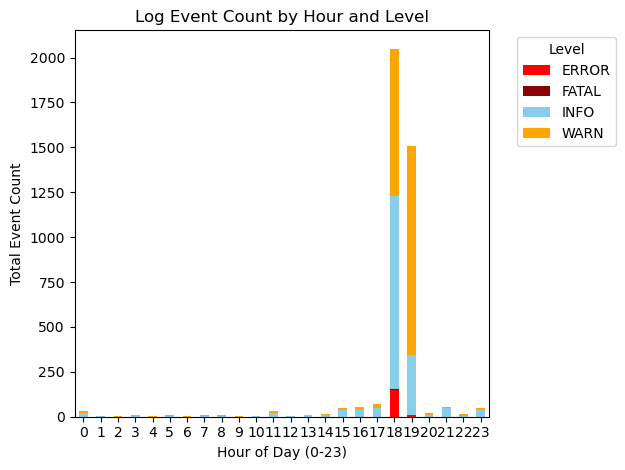

In [48]:
# Use the pandas plot method with the Matplotlib axes (ax=plt.gca())
hourly_level_counts.plot(
    kind='bar', 
    stacked=True,
    ax=plt.gca(),
    # Define custom colors for clarity
    color={'INFO': 'skyblue', 'WARN': 'orange', 'ERROR': 'red', 'FATAL': 'darkred'}
)

# Set labels and title
plt.title('Log Event Count by Hour and Level')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Total Event Count')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [49]:
top_20_components = logs_data['Component'].value_counts().head(20)
print(top_20_components)

Component
org.apache.hadoop.ipc.Client                                         622
188978561024:QuorumCnxManager$SendWorker                             574
188978561024:QuorumCnxManager$RecvWorker                             554
org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator           457
org.apache.hadoop.hdfs.LeaseRenewer                                  326
org.apache.hadoop.mapred.TaskAttemptListenerImpl                     314
3888:QuorumCnxManager$Listener                                       299
0.0.0.0/0.0.0.0:2181:NIOServerCnxn                                    88
0.0.0.0/0.0.0.0:2181:ZooKeeperServer                                  83
0:0:0:0:0:0:0:2181:QuorumCnxManager                                   80
org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl           60
0.0.0.0/0.0.0.0:2181:NIOServerCnxnFactory                             48
ZooKeeperServer                                                       40
2 cport:-1)::PrepRequestProcessor        

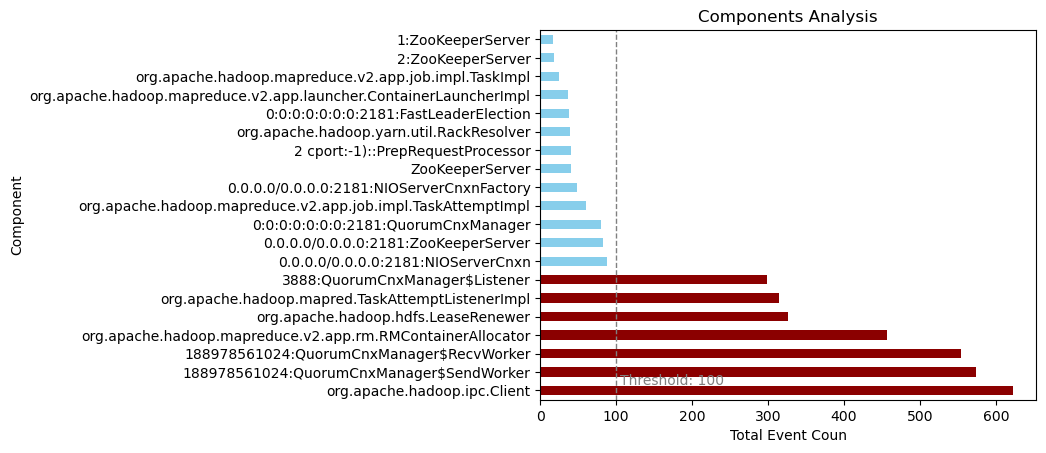

In [50]:
THRESHOLD = 100

# --- 2. Create Conditional Color List ---

# Create a list of colors based on the count for each component
bar_colors = [
    'darkred' if count > THRESHOLD else 'skyblue' 
    for count in top_20_components.values
]

top_20_components.plot(kind='barh',
                      color=bar_colors)

plt.title('Components Analysis')
plt.xlabel('Total Event Coun')
plt.ylabel('Component')
#plt.xticks(rotation=60) # Keep x-axis labels horizontal

# Add a vertical line and label for the threshold
plt.axvline(x=THRESHOLD, color='gray', linestyle='--', linewidth=1)
plt.text(THRESHOLD + 5, 0.5, f'Threshold: {THRESHOLD}', color='gray', va='center')

plt.show()

In [51]:
# Analysis:
#org.apache.hadoop.ipc.Client has the top Eventcount -  622
#188978561024:QuorumCnxManager$SendWorker                      574
#188978561024:QuorumCnxManager$RecvWorker                      554
#org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator    457
#org.apache.hadoop.hdfs.LeaseRenewer                           326
#org.apache.hadoop.mapred.TaskAttemptListenerImpl              314
#3888:QuorumCnxManager$Listener                                299
#whereas the others appear less than 100 times. The nature of these logs has to be analyzed and check if these causes any ERROR oR FATAL issues, ot it's the first step for the fatal issues

In [52]:
logs_data['EventTemplate'].value_counts().head(20)

EventTemplate
address change detected. old: <var>/<var>:<var> new: <var>:<var>                                                                                                             476
failed to renew lease for [dfsclient_nonmapreduce_<var>_<var>] for <var> seconds.  will retry shortly ...                                                                    326
interrupted while waiting for message on queue                                                                                                                               314
received connection request /<var>:<var>                                                                                                                                     299
connection broken for id <var>, my id = <var>, error =                                                                                                                       291
progress of taskattempt attempt_<var> is : <var>.<var>                                               

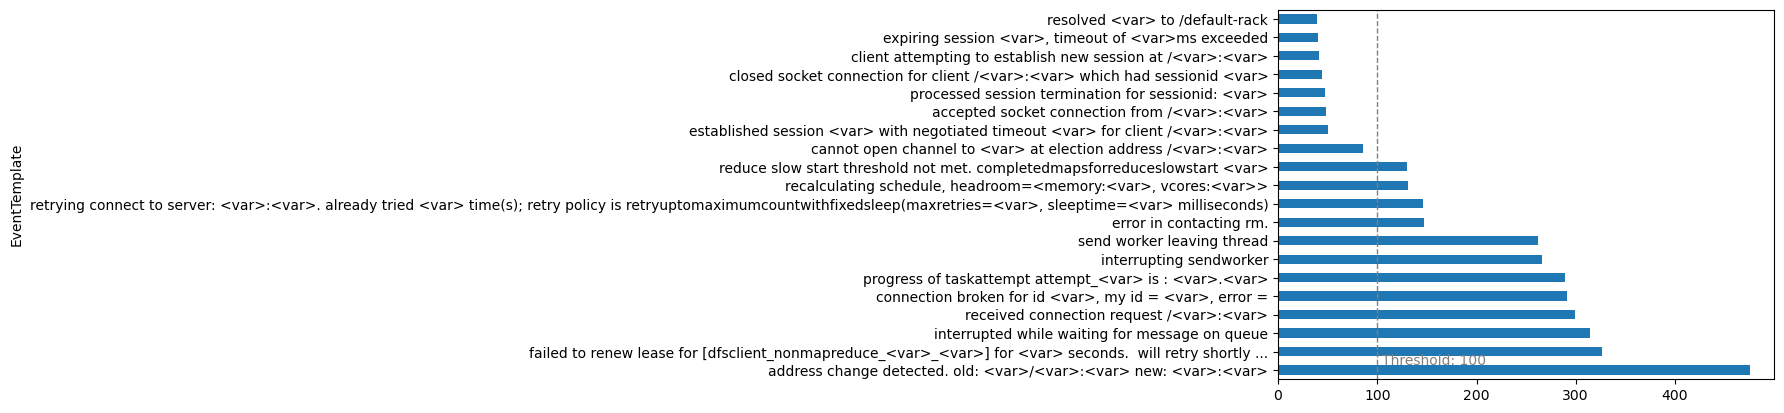

In [53]:
logs_data['EventTemplate'].value_counts().head(20).plot(kind='barh')

plt.axvline(x=THRESHOLD, color='gray', linestyle='--', linewidth=1)
plt.text(THRESHOLD + 5, 0.5, f'Threshold: {THRESHOLD}', color='gray', va='center')

plt.show()

In [54]:
# Analysis of Event Template more than 100 times are 12 of their top counts are:

#address change detected. old: <var>/<var>:<var> new: <var>:<var>                                                                                                             476
#failed to renew lease for [dfsclient_nonmapreduce_<var>_<var>] for <var> seconds.  will retry shortly ...                                                                    326
#interrupted while waiting for message on queue                                                                                                                               314
#received connection request /<var>:<var>                                                                                                                                     299
#connection broken for id <var>, my id = <var>, error =                                                                                                                       291
#progress of taskattempt attempt_<var> is : <var>.<var>                                                                                                                       289
#interrupting sendworker                                                                                                                                                      266
#send worker leaving thread                                                                                                                                                   262
#error in contacting rm.                                                                                                                                                      147
#retrying connect to server: <var>:<var>. already tried <var> time(s); retry policy is retryuptomaximumcountwithfixedsleep(maxretries=<var>, sleeptime=<var> milliseconds)    146
#recalculating schedule, headroom=<memory:<var>, vcores:<var>>                                                                                                                131
#reduce slow start threshold not met. completedmapsforreduceslowstart <var>                                                                                                   130

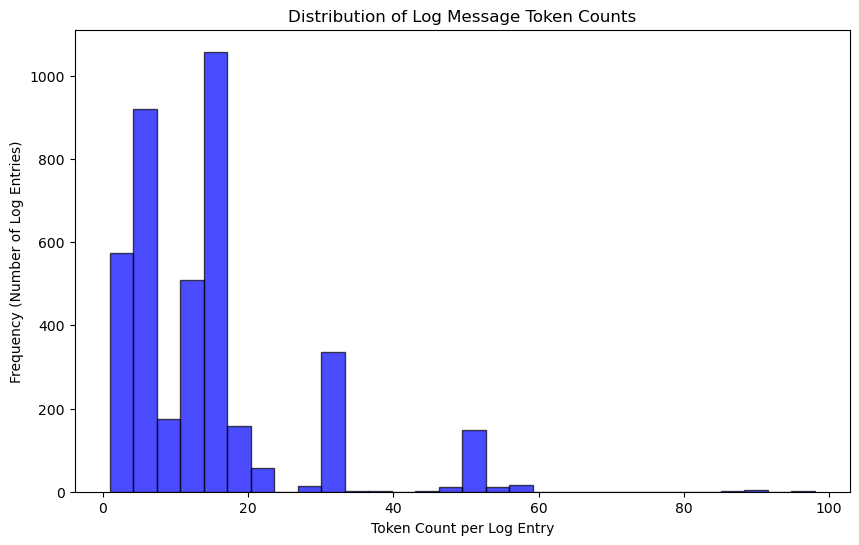

In [55]:
# Token Analysis
plt.figure(figsize=(10, 6))

token_counts = logs_data['tokens'].str.len()

# --- FIX 2: Plot the resulting numeric Series ---
token_counts.plot(
    kind='hist',
    bins=30, 
    edgecolor='black',
    color='blue',
    alpha=0.7
)

plt.title('Distribution of Log Message Token Counts')
plt.xlabel('Token Count per Log Entry')
plt.ylabel('Frequency (Number of Log Entries)')
plt.show()

In [56]:
# Analysis

# Most of the Tokens are less than 20. more than 80% of data have less than 20 tokens in the EventTemplate.

In [57]:
# Group by Component and Level, and count the occurrences
level_counts = logs_data.groupby(['Component', 'Level']).size().reset_index(name='Count')

#Sort the DataFrame by 'Count' in descending order
level_counts_sorted = level_counts.sort_values(by='Count', ascending=False)

print("Example Count Output:")
print(level_counts_sorted.head(10))

Example Count Output:
                                            Component  Level  Count
17           188978561024:QuorumCnxManager$SendWorker   WARN    574
16           188978561024:QuorumCnxManager$RecvWorker   WARN    554
80                       org.apache.hadoop.ipc.Client   WARN    476
75                org.apache.hadoop.hdfs.LeaseRenewer   WARN    326
83   org.apache.hadoop.mapred.TaskAttemptListenerImpl   INFO    312
95  org.apache.hadoop.mapreduce.v2.app.rm.RMContai...   INFO    309
27                     3888:QuorumCnxManager$Listener   INFO    299
94  org.apache.hadoop.mapreduce.v2.app.rm.RMContai...  ERROR    148
79                       org.apache.hadoop.ipc.Client   INFO    146
12                0:0:0:0:0:0:0:2181:QuorumCnxManager   WARN     80


In [58]:
level_counts

,Component,Level,Count
0,0.0.0.0/0.0.0.0:2181:Learner,INFO,3
1,0.0.0.0/0.0.0.0:2181:NIOServerCnxn,INFO,48
2,0.0.0.0/0.0.0.0:2181:NIOServerCnxn,WARN,40
3,0.0.0.0/0.0.0.0:2181:NIOServerCnxnFactory,INFO,48
4,0.0.0.0/0.0.0.0:2181:ZooKeeperServer,INFO,44
...,...,...,...
104,org.apache.hadoop.yarn.event.AsyncDispatcher,INFO,9
105,org.apache.hadoop.yarn.factories.impl.pb.RpcSe...,INFO,1
106,org.apache.hadoop.yarn.util.RackResolver,INFO,39
107,org.apache.hadoop.yarn.webapp.WebApps,INFO,2


<Axes: xlabel='timestamp'>

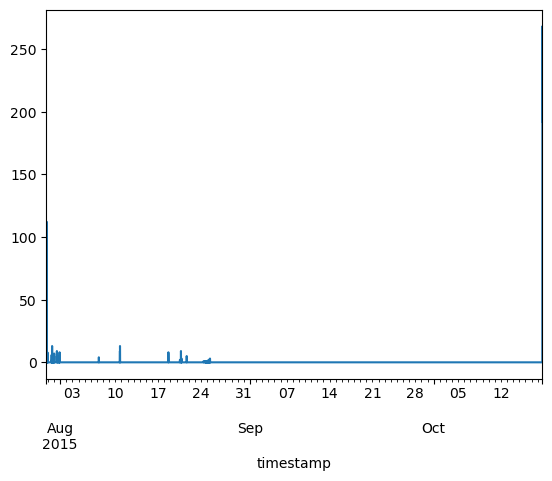

In [59]:
logs_data.set_index('timestamp').resample('1Min').size().plot()

In [65]:
# Assuming 'logs_data' has a 'Level' column and a 'Token_Count' column
logs_data['Token_Count'] = logs_data['tokens'].str.len()

# Group the DataFrame by 'Level' and calculate the mean of 'Token_Count'
average_length_by_level = logs_data.groupby('Level')['Token_Count'].mean().sort_values(ascending=False)

print("Average Token Length by Log Level:\n")
print(average_length_by_level)

Average Token Length by Log Level:

Level
FATAL    87.000000
INFO     16.630193
WARN     13.520696
ERROR     6.484663
Name: Token_Count, dtype: float64


In [66]:
# Seems like the more tokens are used to describe the cause and provide details for FATAL errors.

<Figure size 1000x600 with 0 Axes>

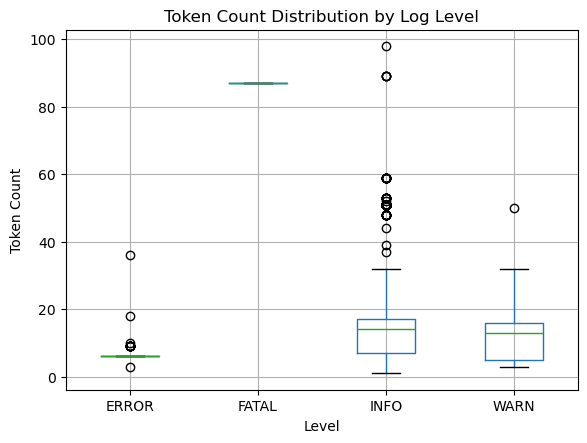

In [67]:
plt.figure(figsize=(10, 6))
logs_data.boxplot(column='Token_Count', by='Level', showfliers=True)
plt.title('Token Count Distribution by Log Level')
plt.suptitle('') # Suppress auto-title
plt.ylabel('Token Count')
plt.show()

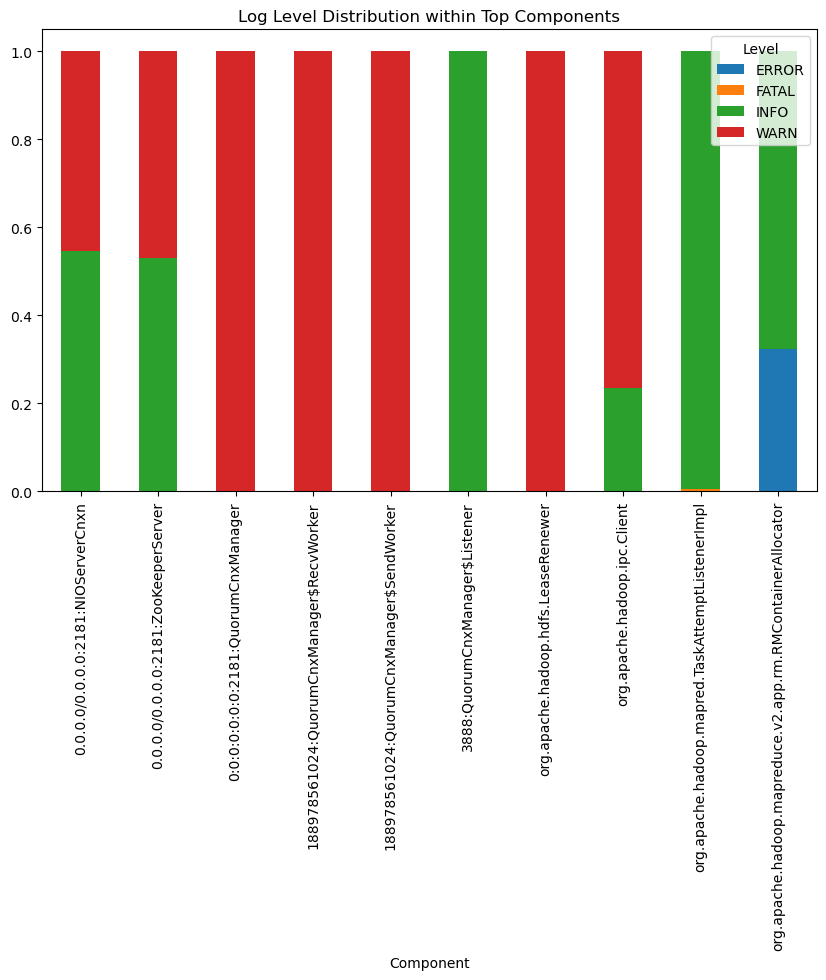

In [68]:
# 1. Select top components
top_components = logs_data['Component'].value_counts().head(10).index
df_top = logs_data[logs_data['Component'].isin(top_components)]

# 2. Group and pivot the data
co_occurrence = df_top.groupby('Component')['Level'].value_counts().unstack(fill_value=0)

# 3. Plot the stacked bar chart (Normalize to 1 for percentage view)
co_occurrence.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Log Level Distribution within Top Components')
plt.show()

In [ ]:
# Save the cleaned updated data for Pre-modelling and modelling
df_tf.to_csv('data_wrangled_reviews_amazon.csv', index=False)